<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): Fabio Victor Galdino Nascimento

# Experimento 01: Processamento Digital de Imagens

In [1]:
!pip install matplotlib
!pip install numpy
!pip install opencv-python

In [2]:
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.

## 1. Numpy Arrays

Podemos utilizar a biblioteca Numpy para escrever arrays e matrizes de forma semelhante ao Matlab:  
* a) A = np.array( [1, 2, 3, 4, 5] )  
* b) B = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )  
* c) C = np.array( [ [ [1, 2], [3, 4] ], [ [1, 2], [3, 4] ] ] )
    
Descrição:  
* O código do item **a)** produz um array unidimensional a partir de uma lista
* Já o do item **b)** produz um array bidimensional, ou uma matriz, a partir de uma lista de listas
* Por fim, o código do item **c)** produz um array tridimensional
* Os arrays podem ser exibidos a partir do comando **print**, como por exemplo em **print(A)**
* É possível checar as dimensões de cada array printando o atributo **shape**, digitando por exemplo **print(A.shape)**

In [3]:
A = np.array( [1, 2, 3, 4, 5] )
print("Array A:")
print(A)
print("\nShape de A:", A.shape)

Array A:
[1 2 3 4 5]

Shape de A: (5,)


In [4]:
B = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )
print("Array B:")
print(B)
print("\nShape de B:", B.shape)

Array B:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Shape de B: (3, 3)


In [5]:
C = np.array( [ [ [1, 2], [3, 4] ], [ [5, 6], [7, 8] ] ] )
print("Array C:")
print(C)
print("\nShape de C:", C.shape)

Array C:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

Shape de C: (2, 2, 2)


Elementos internos dos arrays podem ser acessados utilizando colchetes, por exemplo:

* A[0] acessa o primeiro elemento de A, nesse caso 1;
* B[0, 2] acessa o terceiro elemento da primeira linha de B, ou seja 3.
* C[1, 0, 1] acessa o segundo elemento da primeira linha da segunda matriz de C, ou seja 6;

In [6]:
print("A[0] ==", A[0])

A[0] == 1


In [7]:
print("B[0,2] ==", B[0,2])

B[0,2] == 3


In [8]:
print("C[1, 0, 1] ==", C[1, 0, 1])

C[1, 0, 1] == 6


Também é possível acessar fatias do array utilizando o operador **:** como pode ser visto a seguir:

* A[0:4] retorna um array formado pelos quatro primeiros elementos de A;
* B[2, 0:2] retorna um array unidimensional formado pelos dois primeiros elementos da terceira linha de B;
* C[0, :, :] retorna um array bidimensional formado por todas as linhas e colunas da primeira matriz de C;
* Observe que a contagem dos índices é iniciada em 0;

In [9]:
print("A[0:4]:\n\n", A[0:4])

A[0:4]:

 [1 2 3 4]


In [10]:
print("B[2, 0:2]:\n\n", B[2, 0:2])

B[2, 0:2]:

 [7 8]


In [11]:
print("C[0, :, :]:\n\n", C[0, :, :])

C[0, :, :]:

 [[1 2]
 [3 4]]


## Questão 01
**a. Produza as seguintes matrizes:**  

    A1 = A[1:4] 
    
    B1 = B[1:2, 0:1]  
    
    B2 = B[-1, -2]  
    
    C1 = C[-2, -2, -2]  
    
    C2 = C[0, 0, 0]  
    
    C3 = C[:, 0, 0]  
     

In [12]:
A1 = A[1:4]
B1 = B[1:2, 0:1]  
B2 = B[-1, -2]  
C1 = C[-2, -2, -2]  
C2 = C[0, 0, 0]  
C3 = C[:, 0, 0] 

print("A1 = ", A1)
print("B1 = ", B1)
print("B2 = ", B2)
print("C1 = ", C1)
print("C2 = ", C2)
print("C3 = ", C3)

A1 =  [2 3 4]
B1 =  [[4]]
B2 =  8
C1 =  1
C2 =  1
C3 =  [1 5]


**b. Qual o significado de passar um índice negativo?**  

Ele inverte a leitura padrão das variáveis, exemplo:

A = [1, 2, 3] na leitura fica 1 = -3, 2 = -2 e 3 = -1.

Outro exemplo é utilizando o B2, que recebeu o valor de B[-1, -2] ou seja, última linha, penúltima coluna.
    
**c. C1 é igual a C2? Se sim,Por que?** 

Sim. Já que ambos recebem o mesmo valor.

B[0, 0, 0] = primeira matriz, primeira linha e primeira coluna.

B[-2, -2, -2] = penúltima matriz, penúltima linha e penúltima coluna.

## 2. Tipos de Imagem

1. Vamos trabalhar com quatro tipos de imagens:  

    a. **Imagens de Intensidades:** São matrizes cujos valores representam intensidades em cada ponto. Elementos de intensidade da classe uint8 terão valores no intervalo [0, 255]. Já elementos da classe uint16 terão valores entre [0, 65535].
    
    b. **Imagens Binárias:** São um arranjo lógico em forma de matriz cujos valores são booleanos, podendo ser 0s ou 1s;   
    
    c. **Imagens Indexadas:** São imagens cujo valor de cada pixel está associado a uma cor descrita por um mapa de cores (colormap);  
    
    d. **Imagens Coloridas:** São Imagens com múltiplos canais onde os múltiplos valores associados a um determinado pixel descrevem a sua cor. Um exemplo seriam imagens RGB, onde os diferentes canais descrevem a intensidade luminosa das cores vermelho, verde e azul, respectivamente, de uma imagem;  
    
* Note que os tipos de imagem não são excludentes, uma mesma imagem pode estar associada a mais de um dos tipos descritos.

<IPython.core.display.Javascript object>


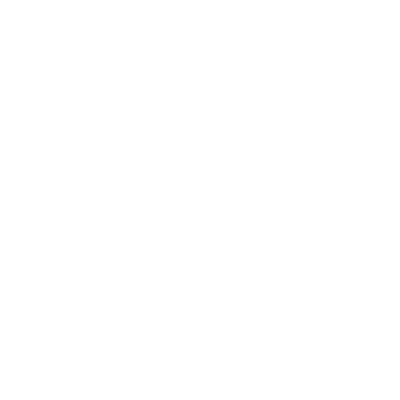

In [13]:
%matplotlib notebook
# Essa linha torna a figura do matplotlib interativa, permitindo visualizar os valores de cada pixel com o mouse.
# A figura deixará de ser interativa quando outra célula for executada. É possível reativá-la ao rodar essa célula novamente.

# Um array do numpy pode ser interpretado como uma imagem de intensidade:
I = np.array( [[0, 50, 100, 150, 200, 250], 
               [0, 50, 100, 150, 200, 250], 
               [0, 50, 100, 150, 200, 250], 
               [0, 50, 100, 150, 200, 250], 
               [0, 50, 100, 150, 200, 250] ] ).astype(np.uint8)

# Podemos utilizar o matplotlib para visualizar a imagem através da função imshow:
fig = plt.figure(figsize=(4, 4))
plt.imshow(I, cmap="gray")

* Observe que a associação das intensidades a cores é arbitrária, podendo ser obtida uma imagem diferente mudando o colormap:

<IPython.core.display.Javascript object>


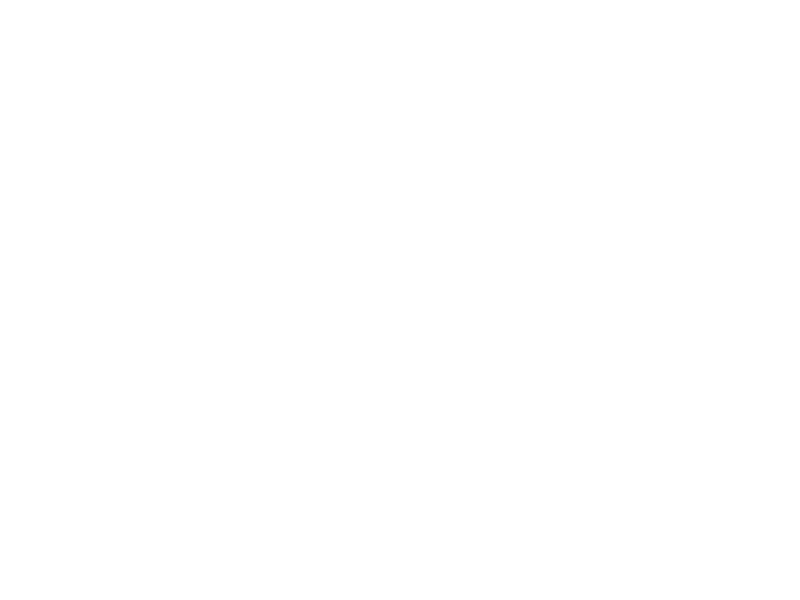

Text(0.5, 1.0, 'Colormap em tons de azul')

In [14]:
%matplotlib notebook
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(8, 6))

## Primeira linha de subfiguras
# Primeira Subfigura
axs[0][0].imshow(I)
axs[0][0].set_title("Colormap Padrão", fontsize = 10)

# Segunda Subfigura
axs[0][1].imshow(I, cmap="gray")
axs[0][1].set_title("Colormap em Escala de Cinza", fontsize = 10)

# Terceira Subfigura
axs[0][2].imshow(I, cmap="Purples")
axs[0][2].set_title("Colormap em tons de roxo", fontsize = 10)

## Segunda linha de subfiguras
# Primeira Subfigura
axs[1][0].imshow(I, cmap="Reds")
axs[1][0].set_title("Colormap em tons de vermelho", fontsize = 10)

# Segunda Subfigura
axs[1][1].imshow(I, cmap="Greens")
axs[1][1].set_title("Colormap em tons de verde", fontsize = 10)

# Terceira Subfigura
axs[1][2].imshow(I, cmap="Blues")
axs[1][2].set_title("Colormap em tons de azul", fontsize = 10)

# Referências de colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Observe que a associação dos valores mínimos e máximos também é arbitrária e pode ser controlada pelos argumentos **vmin** e **vmax**:

<IPython.core.display.Javascript object>


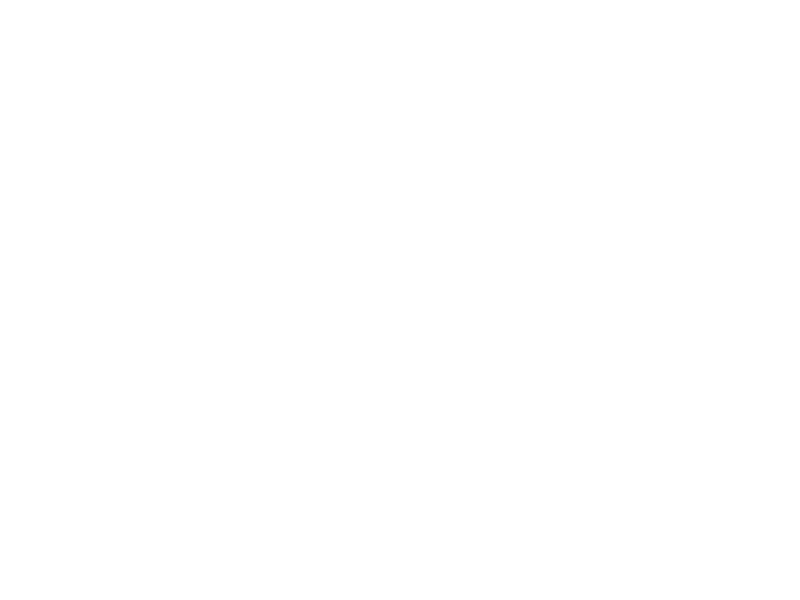

Text(0.5, 1.0, 'vmin = 255, vmax = 256')

In [15]:
%matplotlib notebook
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(8, 6))

## Primeira linha de subfiguras
# Primeira Subfigura
axs[0][0].imshow(I, cmap="gray")
axs[0][0].set_title("Valores Padrão", fontsize = 10)

# Segunda Subfigura
axs[0][1].imshow(I, vmin = 100, vmax = 200, cmap="gray")
axs[0][1].set_title("vmin = 100, vmax = 200", fontsize = 10)

# Terceira Subfigura
axs[0][2].imshow(I, vmin = 25, vmax = 75, cmap="gray")
axs[0][2].set_title("vmin = 25, vmax = 75", fontsize = 10)

## Segunda linha de subfiguras
# Primeira Subfigura
axs[1][0].imshow(I, vmin = -1, vmax = 0, cmap="gray")
axs[1][0].set_title("vmin = -1, vmax = 0", fontsize = 10)

# Segunda Subfigura
axs[1][1].imshow(I, vmin = 115, vmax = 125, cmap="gray")
axs[1][1].set_title("vmin = 115, vmax = 125", fontsize = 10)

# Terceira Subfigura
axs[1][2].imshow(I, vmin = 255, vmax = 256, cmap="gray")
axs[1][2].set_title("vmin = 255, vmax = 256", fontsize = 10)

## Questão 02
* O que acontece com os valores fora do intervalo [vmin, vmax]?

Quando definimos o vmin, tudo que está do valor de vmin até o começo é clipado com os valor que definimos.

De forma semelhante acontece com o vmax, a diferença é que, do valor de vmax até o final que fica clipado com o valor que definimos.

## 3. Convertendo Tipos de Dados:

<IPython.core.display.Javascript object>


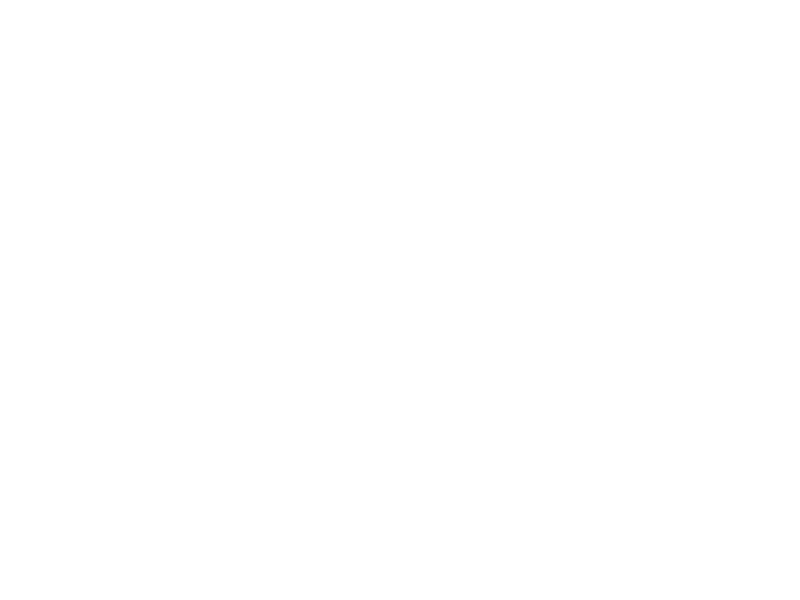

Text(0.5, 0, 'vmin = 0\n vmax = 255')

In [16]:
%matplotlib notebook

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(8, 6))

# É preciso se atentar aos valores da matriz ao converter entre os tipos de array
I16 = np.array( [[  0,   0,   0,   0,   0,   0], 
                 [ 50,  50,  50,  50,  50,  50], 
                 [100, 100, 100, 100, 100, 100], 
                 [150, 150, 150, 150, 150, 150], 
                 [200, 200, 200, 200, 200, 200], 
                 [250, 250, 250, 250, 250, 250], 
                 [300, 300, 300, 300, 300, 300] ] ).astype(np.uint16)

axs[0].imshow(I16, vmin=0, vmax=255, cmap="gray")
axs[0].set_title("Imagem Original uint16", fontsize=10)
axs[0].set_xlabel("vmin = 0\n vmax = 255", fontsize=10)

# A conversão direta sem o reescalonamento dos valores pode produzir resultados inesperados
I8a = I16.astype(np.uint8)
axs[1].imshow(I8a, vmin=0, vmax=255, cmap="gray")
axs[1].set_title("Imagem uint8 s/ \nreescalonamento", fontsize=10)
axs[1].set_xlabel("vmin = 0\n vmax = 255", fontsize=10)

# O reescalonamento melhora os resultados, mas como uint8 não aceita valores decimais ocorrem erros de quantização
rescale_factor = 255 / np.max(I16)
I8b = ( rescale_factor * I16 ).astype(np.uint8)
axs[2].imshow(I8b, vmin=0, vmax=255, cmap="gray")
axs[2].set_title("Imagem uint8 c/ \nreescalonamento", fontsize=10)
axs[2].set_xlabel("vmin = 0\n vmax = 255", fontsize=10)

<IPython.core.display.Javascript object>


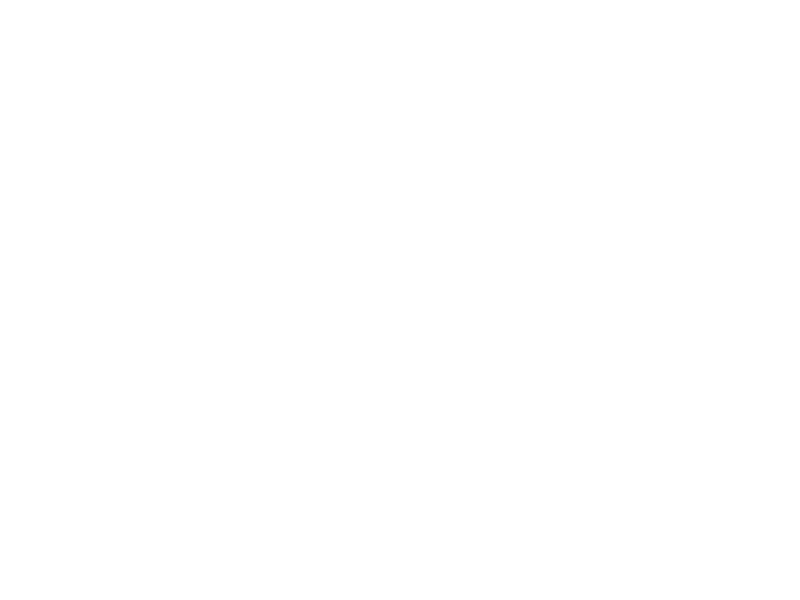

Text(0.5, 0, 'vmin = False\n vmax = True')

In [17]:
%matplotlib notebook

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(8, 6))

# É preciso se atentar aos valores da matriz ao converter entre os tipos de array
I8 = np.array( [[ 36,  47,  75,  32,  18], 
                [  0,  90,   0,  67,  29], 
                [150,  22,  50,  20,  54], 
                [ 50,  34,  65,  40,  50], 
                [  6,  50,   5,  50,  13], 
                [ 39,   1,  50,  25,   0]] ).astype(np.uint8)

axs[0].imshow(I8, vmin=0, vmax=255, cmap="gray")
axs[0].set_title("Imagem Original uint8", fontsize=10)
axs[0].set_xlabel("vmin = 0\n vmax = 255", fontsize=10)

# Imagens formadas a partir de arrays float32 são tipicamente utilizadas em aplicações de IA como Redes Convolucionais.
# Nesse caso, a conversão pode ser realizada dividindo os elementos da matriz por 255, maior valor para imagens uint8.
# Como o tipo float32 aceita valores decimais e dispõe de mais bits para representar os valores, não ocorrem perdas.
Ifloat = (I8 / 255).astype(np.float32)
axs[1].imshow(Ifloat, vmin=0, vmax=1, cmap="gray")
axs[1].set_title("Imagem Float", fontsize=10)
axs[1].set_xlabel("vmin = 0\n vmax = 1.0", fontsize=10)

# Imagens (ou máscaras) binárias são geralmente utilizadas para a extração de características em imagens.
# Nesse caso, a conversão pode ser realizada a partir de um processo de limiarização (thresholding).
# Os valores booleanos podem ser convertidos em números (0s e 1s) mudando o tipo de array para float ou uint.
Ibin = (I8 >= 50)
axs[2].imshow(Ibin, cmap="gray")
axs[2].set_title("Imagem Binária", fontsize=10)
axs[2].set_xlabel("vmin = False\n vmax = True", fontsize=10)

## Questão 03

**a. Produza as seguintes matrizes:**  

    A = [ [16, 3, 2, 13], [6, 9, 12, 7], [5, 10, 11, 8], [4, 15, 14, 8] ]  
    
    B = [ [16, 8, 2, 4], [20, 30, 40, 50], [5, 7, 8, 11] ]  
    
    C = [ [20, 30, 40], [50, 90, 15], [80, 30, 10] ]  
    
    D = [ [1, 2, 3, 4], [5, 6, 7, 8], [9, 8, 8, 9], [8, 7, 7, 8], [4, 5, 9, 8] ]  
    

<IPython.core.display.Javascript object>


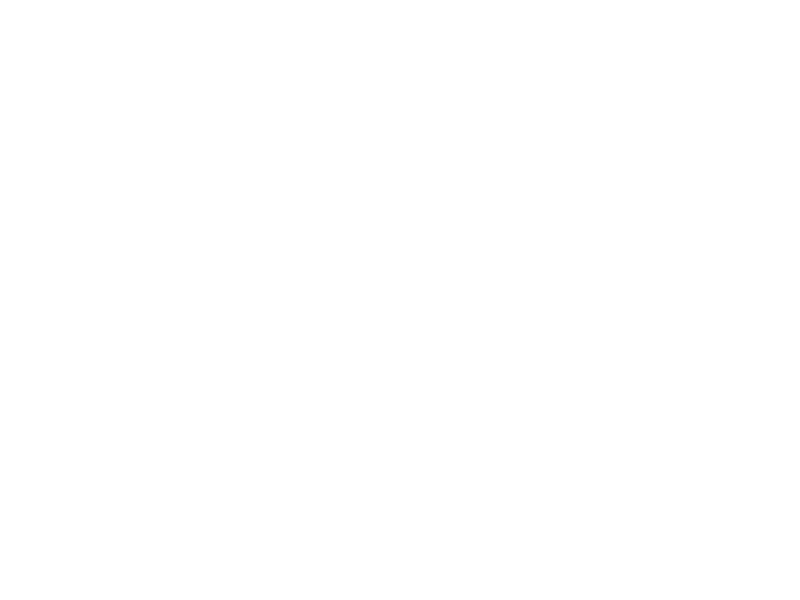

Text(0.5, 1.0, 'D')

In [18]:
A = np.array([[16,  3,  2, 13], 
              [ 6,  9, 12,  7],
              [ 5, 10, 11,  8], 
              [ 4, 15, 14,  8]] ).astype(np.uint8)  

B = np.array([[16,  8,  2,  4],
              [20, 30, 40, 50],
              [ 5,  7,  8, 11]] ).astype(np.uint8)

C = np.array([[20, 30, 40],
              [50, 90, 15],
              [80, 30, 10]] ).astype(np.uint8)  

D = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 8, 8, 9],
              [8, 7, 7, 8],
              [4, 5, 9, 8]] ).astype(np.uint8)  

%matplotlib notebook
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(8, 6))

axs[0].imshow(A, cmap="gray")
axs[0].set_title("A", fontsize = 10)

axs[1].imshow(B, cmap="gray")
axs[1].set_title("B", fontsize = 10)

axs[2].imshow(C, cmap="gray")
axs[2].set_title("C", fontsize = 10)

axs[3].imshow(D, cmap="gray")
axs[3].set_title("D", fontsize = 10)

**b. Plote as seguintes Imagens de Intensidade e comente os resultados.**

* IA = A  
* IB = B, vmin =  4, vmax = 30  
* IC = C, vmin = 15, vmax = 20  
* ID = D, vmin =  0, vmax = 20   

<IPython.core.display.Javascript object>


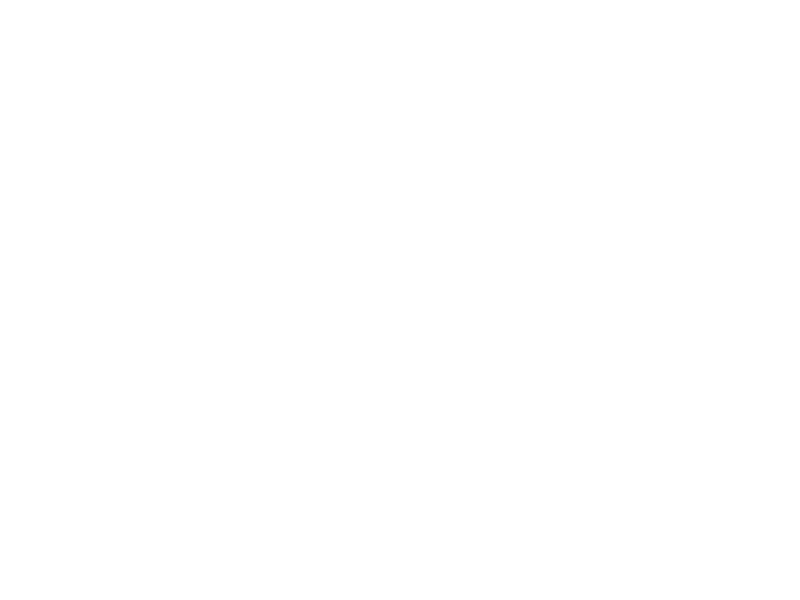

Text(0.5, 1.0, 'ID')

In [19]:
%matplotlib notebook
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(8, 6))

IA = A.astype(np.uint8)
axs[0].imshow(IA, cmap = 'gray')
axs[0].set_title("IA", fontsize = 10)

IB = B.astype(np.uint8)
axs[1].imshow(IB, cmap = 'gray', vmin=4, vmax= 30)
axs[1].set_title("IB", fontsize = 10)

IC = C.astype(np.uint8)
axs[2].imshow(IC, cmap = 'gray', vmin = 15, vmax = 20)
axs[2].set_title("IC", fontsize = 10)

ID = D.astype(np.uint8)
axs[3].imshow(ID, cmap = 'gray', vmin = 0, vmax=20)
axs[3].set_title("ID", fontsize = 10)

**c. Converta a Matriz G abaixo para:**
    
* Uma imagem de intensidade com valores entre [0, 1].
* Uma imagem binária com limiar de 0.25.
* Uma imagem com valores no intervalo [0, 255].
* Comente os resultados encontrados.

    G = [ [-0.7, 1.2, 0.4, -0.6, -0.4, 1.2], [-1.6, -0.6, 0.4, 0.8, 0.0, 0.8], [1.5, -0.5, 0.1, 0.2, -0.8, 1.1], [2.1, 0.9, 0.5, -0.5, -1.6, -0.7], [0.1, -1.4, 1.1, -1.2, 0.2, -0.9], [-1.0, -2.0, 1.0, 0.6, -0.1, -1.3] ]

In [20]:
G = np.array( [[-0.7,  1.2, 0.4, -0.6, -0.4,  1.2],
               [-1.6, -0.6, 0.4,  0.8,  0.0,  0.8],
               [ 1.5, -0.5, 0.1,  0.2, -0.8,  1.1],
               [ 2.1,  0.9, 0.5, -0.5, -1.6, -0.7],
               [ 0.1, -1.4, 1.1, -1.2,  0.2, -0.9],
               [-1.0, -2.0, 1.0,  0.6, -0.1, -1.3] ]).astype(np.float32)


<IPython.core.display.Javascript object>


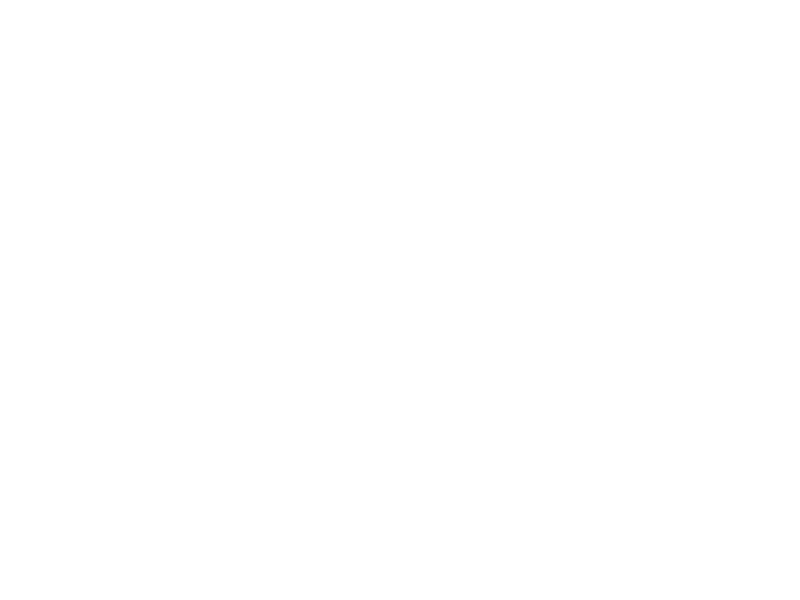

Text(0.5, 0, 'vmin = 0\n vmax = 255')

In [21]:
%matplotlib notebook
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(8, 6))

axs[0].imshow(G, cmap="gray")
axs[0].set_title("Matriz G", fontsize=10)

axs[1].imshow(G, vmin=0, vmax=1, cmap="gray")
axs[1].set_title("Imagem intensidade[0, 1]", fontsize=10)
axs[1].set_xlabel("vmin = 0\n vmax = 1", fontsize=10)

Ib = (G >= 0.25)
axs[2].imshow(Ib, cmap="gray")
axs[2].set_title("Imagem Binária", fontsize=10)
axs[2].set_xlabel("vmin = False\n vmax = True", fontsize=10)

axs[3].imshow(G, vmin=0, vmax=255, cmap="gray")
axs[3].set_title("Imagem intervalo[0, 255]", fontsize=10)
axs[3].set_xlabel("vmin = 0\n vmax = 255", fontsize=10)


Na primeira, colocamos a imagem com intensidade com valores entre [0, 1] e isso fez algumas tonalidades fora desse intervalo ficarem difíceis de distinguir.

Na segunda, a imagem foi convertida para binária com limiar de 0.25 e todos os valores abaixo de desse valor ficaram pretos e acima ficaram brancos.

Na terceira, a imagem foi convertida para imagens com o intervalo [0, 255], deixando a matriz visivelmente com a cor preta, já que é o elemento de maior intensidade.

**d. Com base na matriz G, comente a diferença entre as imagens G1 e G2 abaixo:**

* Observe os valores de diferentes pixels nas mesmas posições.

<IPython.core.display.Javascript object>


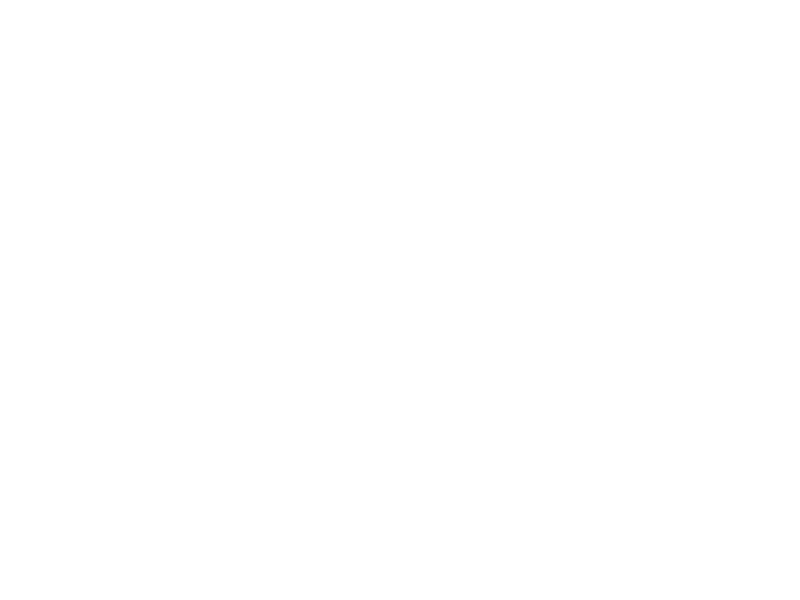

Text(0.5, 1.0, 'Imagem G2')

In [22]:
%matplotlib notebook

G = np.array([ [-0.7, 1.2, 0.4, -0.6, -0.4, 1.2], 
               [-1.6, -0.6, 0.4, 0.8, 0.0, 0.8], 
               [1.5, -0.5, 0.1, 0.2, -0.8, 1.1], 
               [2.1, 0.9, 0.5, -0.5, -1.6, -0.7], 
               [0.1, -1.4, 1.1, -1.2, 0.2, -0.9], 
               [-1.0, -2.0, 1.0, 0.6, -0.1, -1.3] ]).astype(np.float32)

# Produzindo G1 a partir de G
G1 = G - np.min(G)
rescale_factor = 255 / np.max(G1)
G1 = (rescale_factor * G1).astype(np.uint8)
G1 = (G1 / 255).astype(np.float32)

# Produzindo G2 a partir de G
G2 = G - np.min(G)
G2 = (G2 / np.max(G2)).astype(np.float32)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 6))

axs[0].imshow(G1, vmin=0, vmax=1, cmap="gray")
axs[0].set_title("Imagem G1", fontsize=10)

axs[1].imshow(G2, vmin=0, vmax=1, cmap="gray")
axs[1].set_title("Imagem G2", fontsize=10)

**Resposta**

A diferença entre G1 e G2 se dá aos processos realizados, possuindo leves variações na cor. 

## 4. Lendo imagens do computador

A biblioteca OpenCV possibilita carregar imagens do computador como arrays do numpy através da função **imread** (Observe que o comando cv2.imread lê uma imagem colorida como BGR, enquanto o comando plt.imread lê como RGB):  

* **Sintaxe:** im = cv2.imread( filepath, 0 )  

* **Descrição:** A função carrega a o arquivo cujo caminho está contido na string <filepath> e a armazena na variável im como um array do numpy. O flag 0 indica o carregamento do arquivo como imagem monocromática.  

## Questão 04

**a.** Realize a leitura da imagem lenna.jpg (ou outra a sua escolha) e utilize o matplotlib para visualizar a imagem. Analise a variável im produzida, verificando suas dimensões e valores máximo e mínimo.

Dimensões da Imagem: (240, 256, 3)
Valor Mínimo: 0
Valor Máximo: 255


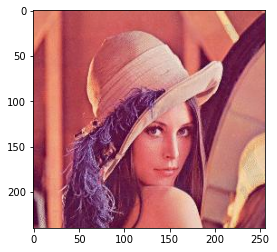

In [23]:
%matplotlib inline

img1 = cv2.imread('lenna.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

print('Dimensões da Imagem:', img1.shape)
print('Valor Mínimo:', np.min(img1))
print('Valor Máximo:', np.max(img1))

**b.** Faça o mesmo para a imagem morangos.jpg (ou outra a sua escolha), mas utilize também a mágica "%matplotlib notebook". Explore as ferramentas da janela produzida.

Dimensões da Imagem: (240, 256, 3)
Valor Mínimo: 0
Valor Máximo: 255


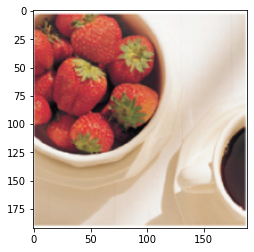

In [24]:
%matplotlib inline

img2 = cv2.imread('morango.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

print('Dimensões da Imagem:', img1.shape)
print('Valor Mínimo:', np.min(img1))
print('Valor Máximo:', np.max(img1))

A biblioteca OpenCV possibilita redimensionar imagens carregadas através da função **resize**:  

* **Sintaxe:** dst_img = cv2.resize( src_img, (cols, rows) )  

* **Descrição:** A função altera as dimensões da imagem <src_img> para as dimensões fornecidas (cols, rows), retornando  <dst_img>, que é a imagem redimensionada. <src_img> pode ser uma imagem monocromática, colorida ou binária e as novas dimensões podem ser maiores ou menores que as originais.

**c.** Carregue a imagem digital.jpg e altere suas dimensões utilizando a função resize para as dimensões listadas a seguir. Verifique as dimensões de cada imagem para confirmar o redimensionamento.

* 240 x 240
* 120 x 120
*  60 x  60
*  30 x  30

In [25]:
%matplotlib notebook
img3 = cv2.imread('mandril.tiff')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

d1 = cv2.resize(img3, (240, 240))
d2 = cv2.resize(img3, (120, 120))
d3 = cv2.resize(img3, (60, 60))
d4 = cv2.resize(img3, (30, 30))

print('Mandril, Redimensionamento 1:', d1.shape)
print('Mandril, Redimensionamento 2:', d2.shape)
print('Mandril, Redimensionamento 3:', d3.shape)
print('Mandril, Redimensionamento 4:', d4.shape)

Mandril, Redimensionamento 1: (240, 240, 3)
Mandril, Redimensionamento 2: (120, 120, 3)
Mandril, Redimensionamento 3: (60, 60, 3)
Mandril, Redimensionamento 4: (30, 30, 3)


**d.** Plote as imagens redimensionadas utilizando subplots e comente os resultados observados.

<IPython.core.display.Javascript object>


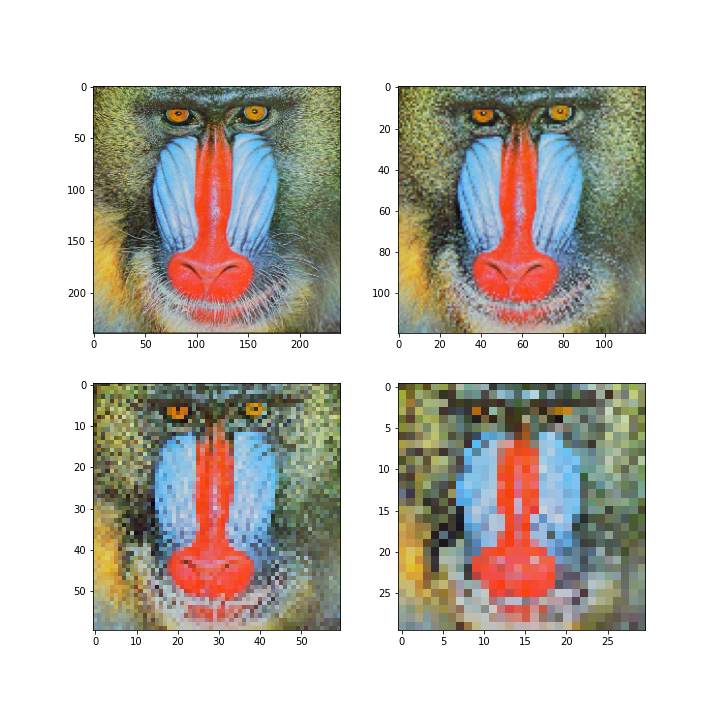

In [26]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))
axs[0, 0].imshow(d1)
axs[0, 1].imshow(d2)
axs[1, 0].imshow(d3)
axs[1, 1].imshow(d4)

Podemos observar o quanto as dimenções são importantes na qualidade da imagem. Quanto menor for a dimensão, mais informações são perdidas em relação a origianal. 